## **FACE RECOGNITION USING CNN**
# Pengenalan Wajah menggunakan Convolutional Neural Networks (CNN)
# Menggunakan Dataset ORL_faces.npz

#**STEP 1 :**
Pertama-tama, Anda harus memasukkan pustaka/libraries yang diperlukan:

In [1]:

import os                                 #Mengimpor modul os yang digunakan untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori.
import sys                                #Mengimpor modul sys yang memberikan akses ke beberapa variabel dan fungsi yang secara langsung mempengaruhi interpreter Python.
import numpy as np                        #untuk melakukan operasi numerik dan komputasi ilmiah.
import pandas as pd                       #untuk analisis data dan manipulasi data.

import matplotlib.pyplot as plt           # untuk membuat plot dan visualisasi data.
%matplotlib inline
import cv2                                # untuk pengolahan citra dan komputer visi.

from pylab import rcParams                #Mengimpor rcParams dari modul pylab. rcParams adalah pengaturan parameter gambar untuk matplotlib.
rcParams['figure.figsize']= 12,5          #Mengatur ukuran default untuk gambar yang dihasilkan oleh matplotlib menjadi 12 inci lebar dan 5 inci tinggi.
rcParams['xtick.labelsize']= 12           #Mengatur ukuran default untuk label sumbu x pada plot menjadi 12.
rcParams['ytick.labelsize']= 12           #Mengatur ukuran default untuk label sumbu y pada plot menjadi 12.
rcParams['axes.labelsize']= 12            #Mengatur ukuran default untuk label sumbu pada plot menjadi 12.

import warnings                           #untuk mengendalikan tampilan peringatan (warning) yang dihasilkan oleh Python.
warnings.filterwarnings(action='ignore',category=DeprecationWarning) #Mengabaikan peringatan DeprecationWarning yang biasanya muncul ketika kita menggunakan fitur yang sudah tidak direkomendasikan dalam versi Python yang lebih baru.
warnings.filterwarnings(action='ignore',category=FutureWarning) #Mengabaikan peringatan FutureWarning yang biasanya muncul ketika kita menggunakan fitur yang akan diubah atau dihapus dalam versi Python yang akan datang.

#**STEP 2:**
LOADING DATA

In [3]:
#load the data -- > .npz format
#berisi data wajah dari dataset ORL Faces.
#Fungsi np.load() digunakan untuk memuat file numpy (.npz) yang berisi larik atau objek Python yang disimpan sebelumnya

data = np.load('ORL_faces.npz')

In [4]:

#Hasilnya akan memberikan informasi tentang jenis objek yang dihasilkan dari pemanggilan fungsi np.load().
type(data)

numpy.lib.npyio.NpzFile

In [5]:
#Dengan menjalankan sorted(data.files), akan mendapatkan daftar nama variabel atau array yang ada dalam file 'ORL_faces.npz'.
sorted(data.files)

['testX', 'testY', 'trainX', 'trainY']

_Data sudah dibagi menjadi train dan test set. Untuk membangun model, kita akan membagi train set menjadi traina dan dev set. Berdasarkan model konvergen terbaik, prediksi akan dilakukan pada set tes_

<a name='3-1'></a>
### _3.1 - Eksplorasi dasar  file npz_

In [6]:
#data['trainX'] digunakan untuk mengakses variabel atau array dengan nama 'trainX' yang tersimpan dalam file 'ORL_faces.npz'.
#Akan mendapatkan nilai dari variabel atau array 'trainX' yang tersimpan dalam file tersebut. Nilai ini mungkin merupakan data pelatihan (training data) untuk model pengenalan wajah yang sedang di bangun.
data['trainX']

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

In [7]:
#'trainY' akan berisi label atau kelas yang mengidentifikasi setiap sampel wajah dalam 'trainX'. 
#Ini penting dalam proses pelatihan model pengenalan wajah untuk mempelajari korelasi antara wajah dan label yang sesuai.
data['trainY']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

_Label-label pada folder tes menunjukkan bahwa ada 20 wajah dari 20 orang. Kedua, konten trainY mengindikasikan bahwa data tidak diacak. Hal ini dapat dilakukan pada saat membagi data menjadi train dan dev set sehingga model dapat menggeneralisasi dengan baik terhadap variasi dan tidak mempelajari pola dari cara data disusun dan disimpan_.

In [8]:
#Untuk mengetahui jenis (type) dari data['trainX'] dan data['trainY']
#memberikan informasi tentang jenis objek yang disimpan dalam data['trainX'] dan data['trainY'].
type(data['trainX']), type(data['trainY'])

(numpy.ndarray, numpy.ndarray)

In [9]:
#untuk memperoleh dimensi atau bentuk dari 'trainX' dan 'trainY' dalam dataset
#data['trainX'].shape akan mengembalikan bentuk atau dimensi dari array 'trainX'
#data['trainY'].shape, yang akan mengembalikan bentuk atau dimensi dari array 'trainY'.
data['trainX'].shape, data['trainY'].shape

((240, 10304), (240,))

_Sesuai deskripsi, setiap gambar berukuran 112 x 92. Kedua, trainX berisi 240 gambar seperti itu dan 160 gambar sisanya adalah bagian dari testX. Satu-satunya cara untuk memvisualisasikan gambar-gambar ini adalah dengan membentuk ulang susunan npzfiles ke dalam bentuk 112x92. 112*92 = 10304 yang sama dengan nilai kedua dalam bentuk data['latihX']. Oleh karena itu, kanal warna adalah 1 yang berarti semua gambar adalah gambar grayscale._

<a name='3-2'></a>
### _3.2 - Membentuk ulang data dan memplot gambar acak__

In [10]:
#untuk mengkonfigurasi dimensi gambar saat membangun atau memproses model pengenalan wajah
#n_rows mewakili jumlah baris (tinggi) dari gambar wajah, 
#n_cols mewakili jumlah kolom (lebar) dari gambar wajah, 
#n_channels mewakili jumlah saluran warna pada gambar..
n_rows = 112
n_cols = 92
n_channels = 1

#trainX = data['trainX']
#testX = data['testX']

#trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(data['trainX']))))/255.
#testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(data['testX']))))/255.

#trainX =  np.reshape(trainX,newshape=(trainX.shape[0],n_rows,n_cols,3))
#testX =  np.reshape(testX,newshape=(testX.shape[0],n_rows,n_cols,3))

trainX =  np.reshape(data['trainX'],newshape=(data['trainX'].shape[0],n_rows,n_cols))
testX =  np.reshape(data['testX'],newshape=(data['testX'].shape[0],n_rows,n_cols))

trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(trainX))))/255.
testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(testX))))/255.


trainY = data['trainY']
testY = data['testY']

In [11]:
#mendapatkan bentuk atau dimensi dari array trainX dan testX. Bentuk ini menggambarkan jumlah baris dan kolom dalam masing-masing array.
trainX.shape, testX.shape

((240, 112, 92, 3), (160, 112, 92, 3))

<a name='3-3'></a>
### _3.3 - Memvisualisasikan wajah_

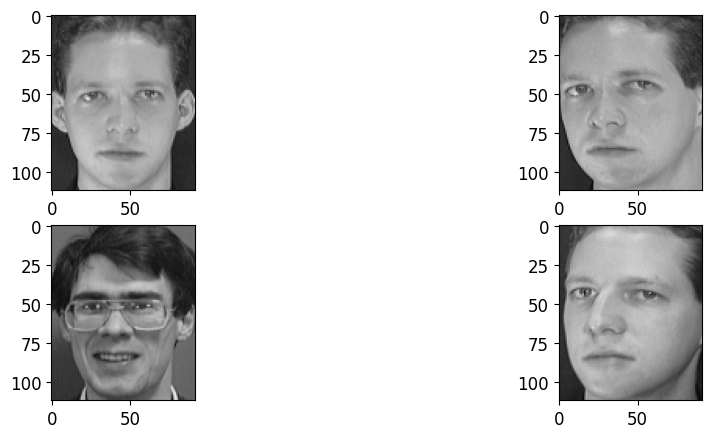

In [14]:
#menghasilkan plot dari empat gambar wajah yang diambil dari trainX dengan menggunakan nilai acak n dan delta.
delta = 5
n = np.random.randint(low=0,high=trainX.shape[0]- 2*delta,dtype=int)

#plot the faces 
plt.subplot(2,2,1)       #Mengatur subplot pertama sebagai posisi gambar pertama dalam grid 2x2.
plt.imshow(trainX[n])
plt.subplot(2,2,2)       #Mengatur subplot kedua sebagai posisi gambar kedua dalam grid 2x2.
plt.imshow(trainX[n+delta])
plt.subplot(2,2,3)       #Mengatur subplot ketiga sebagai posisi gambar ketiga dalam grid 2x2.
plt.imshow(trainX[n-delta])
plt.subplot(2,2,4)       #Mengatur subplot keempat sebagai posisi gambar keempat dalam grid 2x2.
plt.imshow(trainX[n+delta*2])
plt.show()

### _Membagi data menjadi data latih dan data validasi(SPLIT)_

In [15]:
# untuk membagi data pelatihan (trainX dan trainY) menjadi subset pelatihan (X_train dan y_train) dan subset validasi (X_valid dan y_valid).
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(trainX,trainY,random_state=seed,test_size=test_size)
#akan memiliki empat variabel: X_train (subset pelatihan dari trainX), X_valid (subset validasi dari trainX), y_train (subset pelatihan dari trainY), dan y_valid (subset validasi dari trainY)

In [16]:
#untuk mendapatkan dimensi dari X_train dan X_valid dalam dataset 
X_train.shape, X_valid.shape

((216, 112, 92, 3), (24, 112, 92, 3))

In [18]:
#digunakan untuk menguji kinerja model setelah dilatih.
X_test = testX

In [19]:
#berisi label atau kelas yang mengidentifikasi setiap sampel wajah dalam testX.
y_test = testY

In [20]:
#untuk mendapatkan label atau kelas yang sesuai dengan sampel wajah pertama dalam X_train dalam dataset
y_train[0] 

4

<a name='4'></a>
## _4 -  1: Generate Embeddings menggunakan FaceNet_



In [24]:
#load the pretrained facenet mode

from keras.models import load_model #Fungsi ini digunakan untuk memuat model yang telah disimpan sebelumnya.
model = load_model ('facenet_keras.h5') #lokasi file model yang akan dimuat. 
print(model.inputs) #Mencetak input model
print(model.outputs) #mencetak daftar output model

ValueError: ignored

_Untuk menggunakan model facenet yang telah dilatih sebelumnya, larik masukan perlu diubah ukurannya agar sesuai dengan bentuk facenet yang diperlukan seperti yang ditunjukkan oleh model.inputs._ 

In [ ]:
#repeat the same color channels 3 times to make the shape compatible with the facenet model
#X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
#X_valid = np.repeat(X_valid[..., np.newaxis], 3, -1)
#X_test = np.repeat(X_test[..., np.newaxis], 3, -1)

In [25]:
X_train.shape

(216, 112, 92, 3)

In [26]:
#gambar wajah dalam X_train, X_valid, dan X_test akan diperbesar menjadi 160x160 piksel dengan 3 saluran warna (merah, hijau, biru). 
#Proses ini dapat berguna untuk memastikan bahwa gambar wajah memiliki dimensi yang konsisten dan cocok dengan model yang akan digunakan.
X_train = np.resize(X_train,(X_train.shape[0],160,160,3))
X_valid = np.resize(X_train,(X_valid.shape[0],160,160,3))
X_test = np.resize(X_train,(X_test.shape[0],160,160,3))

In [27]:
#untuk mendapatkan dimensi baru dari X_train, X_valid, dan X_test. Output akan memberikan informasi tentang jumlah sampel dan dimensi gambar 
X_train.shape, X_valid.shape, X_test.shape

((216, 160, 160, 3), (24, 160, 160, 3), (160, 160, 160, 3))

In [28]:
#scale the inputs
#X_train = X_train / 255.
#X_valid = X_valid / 255.
#X_test = X_test / 255.

In [29]:
#representasi embedding adalah representasi numerik yang menggambarkan fitur-fitur penting dari wajah. 
#Representasi ini dapat digunakan untuk membandingkan wajah, mendeteksi kesamaan, atau melatih model lain untuk tugas-tugas seperti verifikasi atau identifikasi wajah.

y_train_embeddings = model.predict(X_train)
y_valid_embeddings = model.predict(X_valid)
y_test_embeddings = model.predict(X_test)

#untuk menghasilkan representasi embedding dari setiap sampel dalam X_train, X_valid, dan X_test menggunakan model yang telah dimuat. 
#Hasilnya akan disimpan dalam variabel y_train_embeddings, y_valid_embeddings, dan y_test_embeddings.

NameError: ignored

In [ ]:
#untuk mendapatkan dimensi dari y_train_embeddings. 
#Outputnya akan memberikan informasi tentang jumlah sampel dan dimensi representasi embedding untuk setiap sampel dalam X_train.
y_train_embeddings.shape

(216, 128)

In [ ]:
#Jalankan kode tersebut untuk melakukan normalisasi pada representasi embedding (y_train_embeddings, y_valid_embeddings, y_test_embeddings). 
#Hasilnya akan disimpan dalam variabel embed_train_norm, embed_valid_norm, dan embed_test_norm.
from sklearn.preprocessing import Normalizer #Normalizer dari modul sklearn.preprocessing digunakan untuk melakukan normalisasi pada representasi embedding yang dihasilkan 
input_encoder = Normalizer(norm='l2')
embed_train_norm = input_encoder.transform(np.reshape(y_train_embeddings,(-1,128)))
embed_valid_norm = input_encoder.transform(np.reshape(y_valid_embeddings,(-1,128)))
embed_test_norm = input_encoder.transform(np.reshape(y_test_embeddings,(-1,128)))

In [ ]:
#untuk mendapatkan dimensi dari embed_train_norm. 
#Outputnya akan memberikan informasi tentang jumlah sampel dan dimensi representasi embedding yang telah dinormalisasi dalam embed_train_norm.
embed_train_norm.shape

(216, 128)

<a name='4-1'></a>
### _4.1 - Use Support Vector Machines untuk mengklasifikasikan face embeddings vectors_

In [ ]:
#Support Vector Machine (SVM) untuk klasifikasi. 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
#sebuah objek SVC dengan konfigurasi tertentu dibuat, 
#dan model SVM dilatih menggunakan representasi embedding yang telah dinormalisasi embed_train_norm dan label y_train.
svc_clf = SVC(kernel ='linear',C=10.0,probability=True)

svc_clf.fit(embed_train_norm,y_train)

#model SVM akan dilatih menggunakan representasi embedding yang telah dinormalisasi dan label yang sesuai. 
#Model ini dapat digunakan untuk melakukan prediksi pada data baru atau untuk mengevaluasi performa pada data validasi atau data pengujian.

SVC(C=10.0, kernel='linear', probability=True)

In [ ]:
 #menggunakan model svc_clf yang telah dilatih sebelumnya untuk melakukan prediksi pada data latih, data validasi, 
 #dan data pengujian yang telah diubah menjadi representasi embedding yang dinormalisasi.
y_pred_train = svc_clf.predict(embed_train_norm) #Melakukan prediksi pada data latih dengan memanggil metode predict() dari objek svc_clf. Hasil prediksi akan disimpan dalam variabel y_pred_train.
y_pred_valid = svc_clf.predict(embed_valid_norm) #Melakukan prediksi pada data validasi dengan memanggil metode predict() dari objek svc_clf. Hasil prediksi akan disimpan dalam variabel y_pred_valid.
y_pred_test = svc_clf.predict(embed_test_norm) # Melakukan prediksi pada data pengujian dengan memanggil metode predict() dari objek svc_clf. Hasil prediksi akan disimpan dalam variabel y_pred_test.

In [ ]:
#accuracy_score dari modul sklearn.metrics untuk menghitung akurasi pada set data latih, data validasi, dan data pengujian.
print('Accuracy on train set %.3f' %accuracy_score(y_train,y_pred_train))
print('Accuracy on the validation set %.3f' %accuracy_score(y_valid,y_pred_valid))
print('Accuracy on the test set %.3f' %accuracy_score(testY,y_pred_test))
#dapat mengukur akurasi prediksi model SVM pada set data yang berbeda. 
#Akurasi merupakan salah satu metrik yang umum digunakan untuk mengevaluasi kinerja model klasifikasi, yang menghitung persentase prediksi yang benar dari keseluruhan prediksi.

Accuracy on train set 0.162
Accuracy on the validation set 0.042
Accuracy on the test set 0.069


<a name='5'></a>
## _5 -  2: Klasifikasi Wajah menggunakan cara klasifikasi gambar normal_


In [ ]:
#np.reshape untuk mengubah dimensi dari data gambar latih dan uji menjadi bentuk yang sesuai dengan model.
n_rows = 112
n_cols = 92
n_channels = 1

trainX =  np.reshape(data['trainX'],newshape=(data['trainX'].shape[0],n_rows,n_cols,n_channels))
testX =  np.reshape(data['testX'],newshape=(data['testX'].shape[0],n_rows,n_cols,n_channels))
trainY = data['trainY']
testY = data['testY']
#Dengan menggunakan np.reshape,  mengubah dimensi data gambar latih dan uji menjadi bentuk yang sesuai dengan model CNN yang akan digunakan. 
#Ini memungkinkan untuk memasukkan data gambar ke dalam model dan melatih serta menguji model menggunakan data yang telah diubah dimensinya.

In [ ]:
#np.random.permutation untuk membuat urutan acak dari indeks data latih, 
#dan kemudian menggunakan indeks yang diacak untuk mengacak ulang urutan data latih dan label kelas yang sesuai.
shuffled_indices = np.random.permutation(len(trainX))
X_train = trainX[shuffled_indices]
y_train = trainY[shuffled_indices]

#Dengan melakukan pengacakan ulang ini, Anda memastikan bahwa urutan data latih dan label kelas yang digunakan dalam pelatihan model menjadi acak, 
#sehingga mengurangi kemungkinan adanya bias yang mungkin terkait dengan urutan data.

In [ ]:
# dapat menggunakan variabel X_test untuk melakukan prediksi pada data gambar uji dan variabel y_test untuk membandingkan hasil prediksi dengan label kelas yang sebenarnya.
X_test = testX
y_test = testY

In [ ]:
#tensorflow
import tensorflow as tf

<a name='5-1'></a>
### _5.1 - Mendefinisikan Arsitektur Model berbasis API Fungsional_

In [ ]:
def convolutional_model(input_shape,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu',
                        kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)):
    
    '''CNN and Dense Model using Functional API'''
    
    input_img = tf.keras.Input(shape=input_shape[1:])
    #Conv2D layer
    Z1 = tf.keras.layers.Conv2D(filters=n_filters,kernel_size=(kernel_size,kernel_size),strides=strides,padding=padding)(input_img)
    ##ReLU activation layer
    A1 = tf.keras.layers.Activation(activation)(Z1)
    ##MAXPOOL
    P1 = tf.keras.layers.MaxPool2D(pool_size=(n_filters,n_filters),strides=strides*8,padding=padding)(A1)
    ##Conv2D
    Z2 = tf.keras.layers.Conv2D(filters=n_filters*2,kernel_size=(int(kernel_size/2),int(kernel_size/2)),strides=strides,padding=padding)(P1)
    ##ReLU
    A2 = tf.keras.layers.Activation(activation)(Z2)
    ##MAXPool
    P2 = tf.keras.layers.MaxPool2D(pool_size=(int(n_filters/2)),strides=strides*4,padding=padding)(A2)
    ##Flatten
    F = tf.keras.layers.Flatten()(P2)
    ##Dense layers
    D1 = tf.keras.layers.Dense(units=units,activation=activation)(F)
    D2 = tf.keras.layers.Dense(units=int(units/2),activation=activation,kernel_regularizer=kernel_regularizer)(D1)
    D3 = tf.keras.layers.Dense(units=int(units/4),activation=activation,kernel_regularizer=kernel_regularizer)(D2)
    ##output layer
    outputs = tf.keras.layers.Dense(units=20,activation='softmax')(D3)
    
    #instantiate the model
    model = tf.keras.Model(inputs=input_img,outputs=outputs)
    return model    

In [ ]:
#set the shape and the regularizer to be applied
INPUT_SHAPE = (X_train.shape[0],112,92,1)
kernel_regularizer = tf.keras.regularizers.L2(l2=0.05)

#call the convolutional model 
conv_model = convolutional_model(input_shape=INPUT_SHAPE,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu',
                                kernel_regularizer=kernel_regularizer)
#compile the model
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 92, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 92, 8)        136       
_________________________________________________________________
activation (Activation)      (None, 112, 92, 8)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 12, 16)        528       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 12, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 3, 16)          0     

<a name='5-2'></a>
### _5.2 - Tentukan panggilan balik khusus_

In [ ]:
class MyQualityThreshold(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyQualityThreshold, self).__init__()
        self.cl = cl
  
    def on_epoch_end(self,epoch,logs=None):
        testScore = logs['val_accuracy']
        trainScore = logs['accuracy']

        if testScore > self.cl:
              self.model.stop_training=True

<a name='5-3'></a>
### _5.3 - Train the model_

In [ ]:
#fit the model
history = conv_model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),verbose=2,
                        callbacks=[MyQualityThreshold(0.92)],batch_size=32)

Epoch 1/100
8/8 - 2s - loss: 68.9109 - accuracy: 0.0292 - val_loss: 57.4217 - val_accuracy: 0.0688
Epoch 2/100
8/8 - 1s - loss: 48.4708 - accuracy: 0.1750 - val_loss: 38.7577 - val_accuracy: 0.2375
Epoch 3/100
8/8 - 1s - loss: 35.2053 - accuracy: 0.2708 - val_loss: 31.2739 - val_accuracy: 0.2688
Epoch 4/100
8/8 - 1s - loss: 29.2863 - accuracy: 0.4375 - val_loss: 26.8228 - val_accuracy: 0.4750
Epoch 5/100
8/8 - 1s - loss: 25.1867 - accuracy: 0.6750 - val_loss: 23.4986 - val_accuracy: 0.6750
Epoch 6/100
8/8 - 1s - loss: 22.2305 - accuracy: 0.8125 - val_loss: 21.1128 - val_accuracy: 0.7250
Epoch 7/100
8/8 - 1s - loss: 20.0103 - accuracy: 0.9083 - val_loss: 19.2366 - val_accuracy: 0.8687
Epoch 8/100
8/8 - 1s - loss: 18.3734 - accuracy: 0.9750 - val_loss: 17.8730 - val_accuracy: 0.8625
Epoch 9/100
8/8 - 1s - loss: 17.1719 - accuracy: 0.9833 - val_loss: 16.8293 - val_accuracy: 0.8625
Epoch 10/100
8/8 - 1s - loss: 16.1952 - accuracy: 0.9958 - val_loss: 15.9831 - val_accuracy: 0.8938
Epoch 11/

<a name='5-4'></a>
### _5.4 - Visualize Model Performance_

In [ ]:
#create a dataframe of the model training history
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,68.910942,0.029167,57.421715,0.06875
1,48.470757,0.175000,38.757702,0.23750
2,35.205284,0.270833,31.273916,0.26875
3,29.286291,0.437500,26.822788,0.47500
4,25.186655,0.675000,23.498615,0.67500


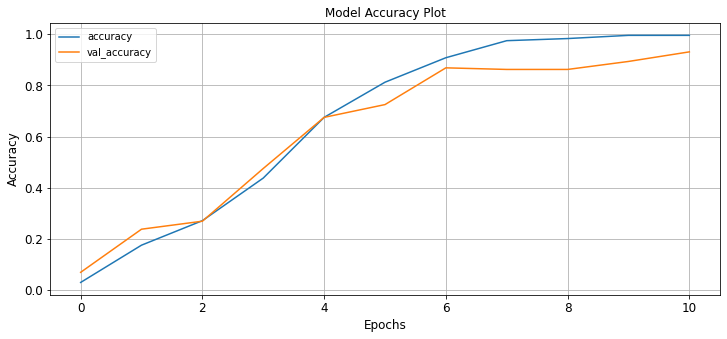

In [ ]:
#plot the accuracy over the training and test set
results[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

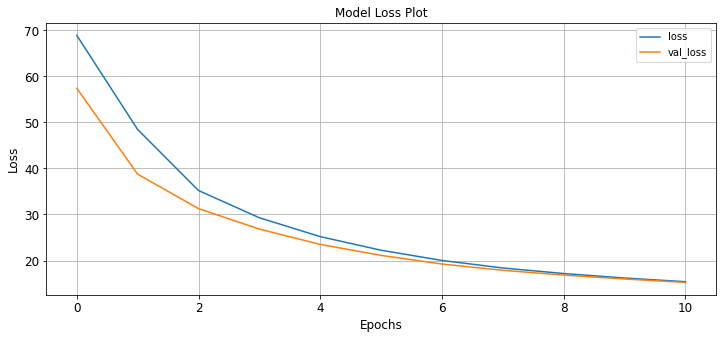

In [ ]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

**TERIMA KASIH**